In [1]:
import warnings
warnings.filterwarnings('ignore')
# Reading the dataset
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
LoanData=pd.read_csv(r'..\input\train.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
LoanData.head(10)

Shape before deleting duplicate values: (67463, 35)
Shape After deleting duplicate values: (67463, 35)


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,98957.47561,Not Verified,n,Credit card refinancing,7.914333,3,2,16,0,2277,51.564476,20,w,464.818124,0.088584,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,102391.82430,Verified,n,Home improvement,15.083911,0,0,11,0,14501,46.808804,37,w,525.738109,0.083528,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,61723.52014,Not Verified,n,Debt consolidation,29.829715,0,0,14,0,13067,23.936624,33,w,1350.245212,0.044965,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,63205.09072,Verified,n,Credit card refinancing,26.244710,0,0,6,0,549,15.947386,17,w,4140.198978,0.017106,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,42015.46586,Source Verified,n,Credit card refinancing,10.048549,1,0,11,0,1361,35.073345,30,f,2149.666963,0.008338,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


<AxesSubplot:xlabel='Loan Status'>

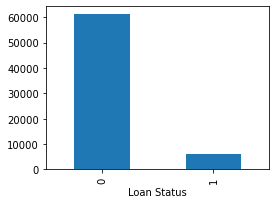

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [5]:
LoanData.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [6]:
UselessColumns = ['ID','Batch Enrolled','Payment Plan','Loan Title','Accounts Delinquent']
LoanData = LoanData.drop(UselessColumns,axis=1)
LoanData.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,D3,RENT,39833.92100,Source Verified,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0


array([[<AxesSubplot:title={'center':'Loan Amount'}>,
        <AxesSubplot:title={'center':'Funded Amount'}>,
        <AxesSubplot:title={'center':'Funded Amount Investor'}>,
        <AxesSubplot:title={'center':'Interest Rate'}>],
       [<AxesSubplot:title={'center':'Home Ownership'}>,
        <AxesSubplot:title={'center':'Debit to Income'}>,
        <AxesSubplot:title={'center':'Open Account'}>,
        <AxesSubplot:title={'center':'Revolving Balance'}>],
       [<AxesSubplot:title={'center':'Revolving Utilities'}>,
        <AxesSubplot:title={'center':'Total Accounts'}>,
        <AxesSubplot:title={'center':'Total Received Interest'}>,
        <AxesSubplot:title={'center':'Total Received Late Fee'}>],
       [<AxesSubplot:title={'center':'Recoveries'}>,
        <AxesSubplot:title={'center':'Collection Recovery Fee'}>,
        <AxesSubplot:title={'center':'Last week Pay'}>,
        <AxesSubplot:title={'center':'Total Collection Amount'}>],
       [<AxesSubplot:title={'center':'Total

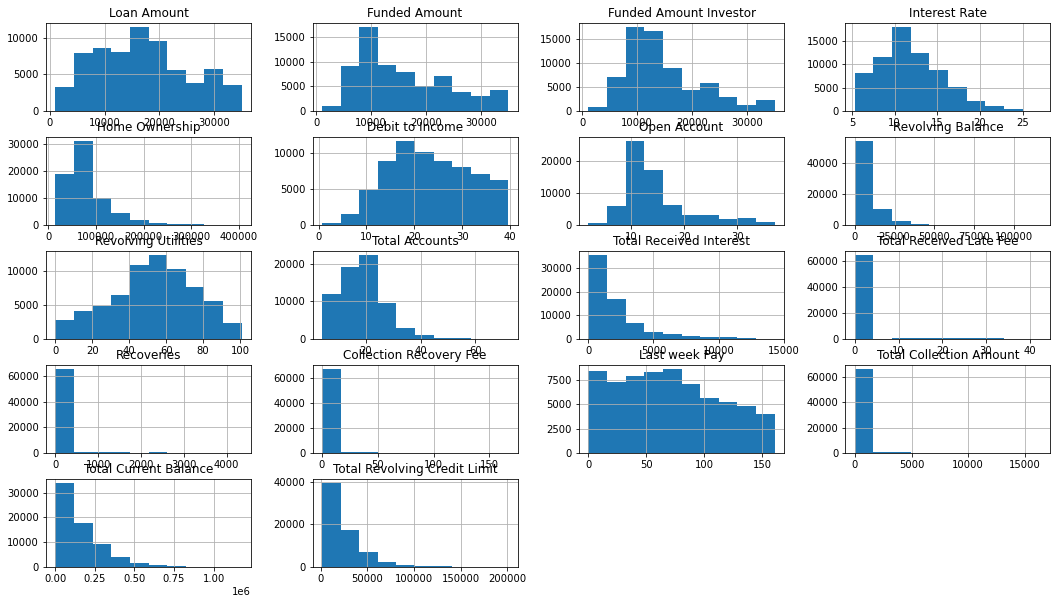

In [7]:
LoanData.hist(['Loan Amount','Funded Amount', 'Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Open Account','Revolving Balance','Revolving Utilities','Total Accounts','Total Received Interest','Total Received Late Fee','Recoveries', 'Collection Recovery Fee',
                   'Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit'], figsize=(18,10))

In [8]:
LoanData['Total Received Late Fee'][LoanData['Total Received Late Fee']>15].sort_values()

6942     15.007587
19291    15.049741
30552    15.055191
29207    15.065754
62885    15.069966
17353    15.078324
21585    15.080634
55722    15.086457
47820    15.102472
48577    15.132725
44715    15.139609
11755    15.157519
65261    15.170080
58728    15.175852
22218    15.185866
62403    15.189247
45870    15.195246
56043    15.196445
51862    15.198185
4860     15.207674
43904    15.233023
57931    15.234410
32557    15.258952
10565    15.300502
56055    15.322107
15338    15.330173
12240    15.336974
56674    15.361376
52253    15.373686
41639    15.378922
5986     15.382752
2204     15.382832
65035    15.407749
13668    15.412832
64333    15.413734
14860    15.414302
9692     15.424383
1195     15.427774
63791    15.429621
24901    15.432355
15367    15.452085
61765    15.477639
13878    15.478094
41720    15.491245
56032    15.495812
59393    15.504601
11135    15.505873
47069    15.513277
14554    15.549562
9898     15.564684
2059     15.565008
24677    15.567045
25300    15.

In [9]:
LoanData['Total Received Late Fee'][LoanData['Total Received Late Fee']>15] = 15.007587

In [10]:
LoanData['Revolving Balance'][LoanData['Revolving Balance']>60000].sort_values()

18748     60243
28727     60279
49080     60825
14401     60874
3283      61297
34934     61318
50962     61371
10930     61458
19759     61819
21405     61839
51998     61841
17892     61938
26092     62250
54590     62344
19363     62453
10721     62492
18527     62526
49607     62758
61285     62799
19687     62896
24297     63434
46479     63525
30565     63545
40747     63611
35611     64320
45322     64625
61200     64790
28036     65127
34486     65383
48057     65665
17295     66109
50642     66112
16838     66166
41697     66244
28618     66302
25640     66386
32500     66408
56435     66532
51501     66858
27395     66883
15960     67002
34183     67076
6019      67140
26525     67356
35035     67593
3006      67682
50673     67756
16911     68296
502       68741
48955     68899
27429     69065
58010     69753
16908     69932
2838      70059
19642     70462
24566     70721
45623     70828
19008     71422
32553     71808
3359      71875
12377     72493
55427     72515
29463   

In [11]:
LoanData['Revolving Balance'][LoanData['Revolving Balance']>60000] = 60243

In [12]:
LoanData['Total Collection Amount'][LoanData['Total Collection Amount']>5000].sort_values()

31432     5026
54141     5029
11900     5050
30772     5058
28750     5062
66701     5194
17407     5221
67368     5302
59021     5726
31482     5996
63858     6564
14840     7282
3382      7402
11273     7402
64930     7486
42932     7684
24929     7925
47215     8010
53446     8088
977       8124
64670     8132
23173     8152
60038     8217
22914     8268
30302     8321
53976     8366
57656     8375
54084     8390
4187      8426
17937     8593
39978     8642
13294     8696
38523     8824
50385     8875
13628     8979
62354     8981
46267     9075
34253     9215
36203     9382
32541     9413
42636     9418
65980     9503
37565     9524
4568      9568
25084     9633
40314     9715
45486     9767
57406     9837
51104     9847
43603     9865
63908     9917
67267     9920
8349     10067
35886    10139
1203     10157
12229    10193
9014     10230
50095    10245
4472     10267
34933    10316
54100    10341
39205    10354
52088    10460
17819    10480
59155    10500
27261    10587
42889    1

In [13]:
LoanData['Total Collection Amount'][LoanData['Total Collection Amount']>5000] = 5026

In [14]:
LoanData['Recoveries'][LoanData['Recoveries']>1500].sort_values()

57859    1500.916746
8318     1501.296925
17640    1504.362389
42643    1506.572138
21452    1508.383460
9531     1514.089632
19481    1516.527895
8025     1516.943853
21860    1517.283508
28573    1519.650240
527      1522.095645
47398    1522.482653
25160    1522.950682
52536    1532.732247
23226    1533.050544
62646    1534.765310
40959    1535.974562
56513    1536.487532
34663    1537.949489
59530    1543.084715
56423    1543.947260
12826    1548.610339
22996    1549.714640
20029    1554.460981
59265    1558.945076
3474     1564.241560
20272    1564.390983
45720    1564.922461
57059    1565.050613
46142    1565.213747
36477    1565.860343
44791    1568.793015
6221     1570.106018
61449    1572.434482
5785     1576.933123
10888    1578.338147
47829    1579.412052
13026    1581.291204
56930    1581.701465
44527    1582.361721
48814    1582.777196
14944    1585.305446
61248    1585.853869
1466     1586.212671
66529    1587.290748
45081    1587.439649
31753    1588.387645
36459    1588

In [15]:
LoanData['Recoveries'][LoanData['Recoveries']>1500] = 1500.916746

In [16]:
LoanData['Collection Recovery Fee'][LoanData['Collection Recovery Fee']>50].sort_values()

66487     50.664855
7654      50.847053
5272      51.048412
50270     51.427117
33111     53.465084
2888      54.222788
61024    166.833000
Name: Collection Recovery Fee, dtype: float64

In [17]:
LoanData['Collection Recovery Fee'][LoanData['Collection Recovery Fee']>50] = 50.664855

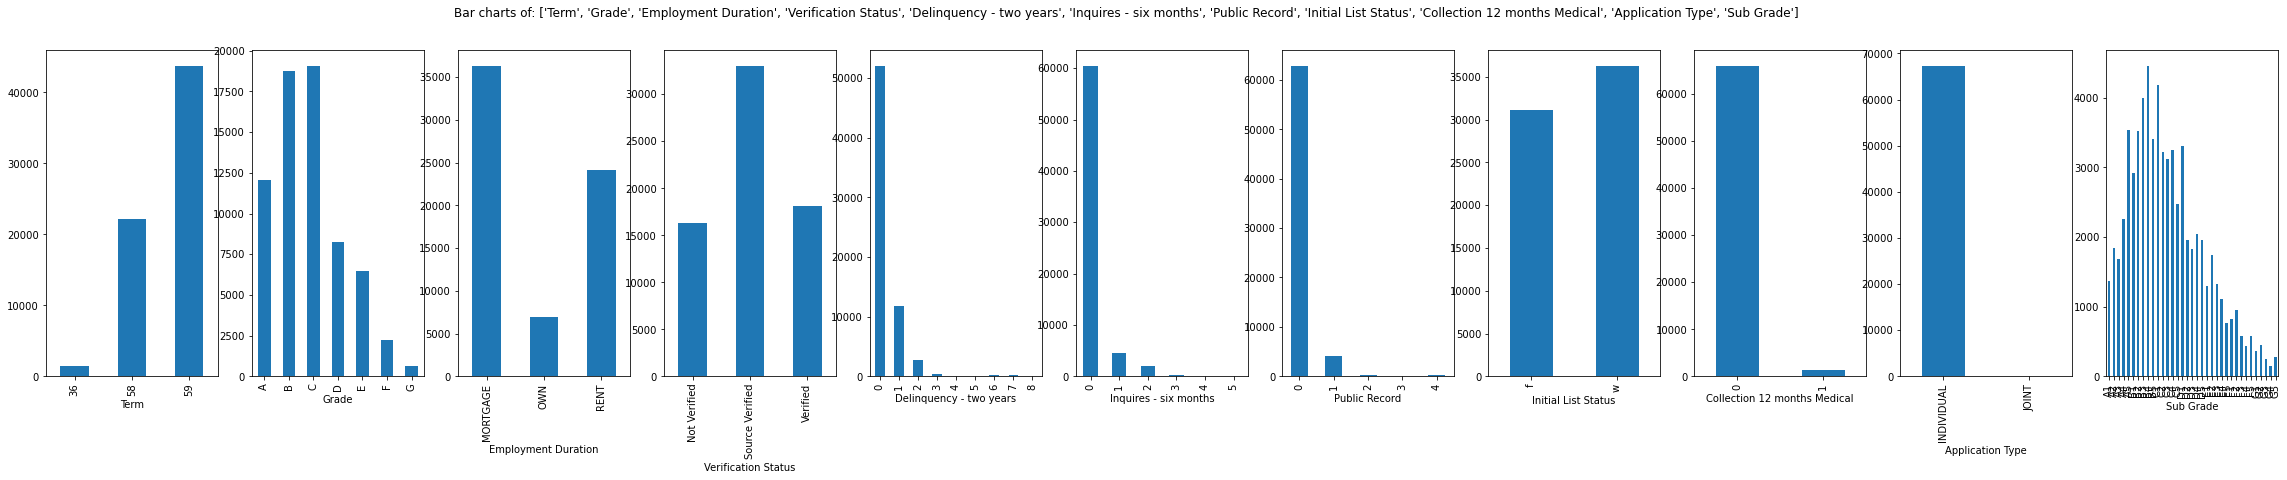

In [18]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Delinquency - two years','Inquires - six months', 'Public Record', 'Initial List Status','Collection 12 months Medical','Application Type','Sub Grade'])

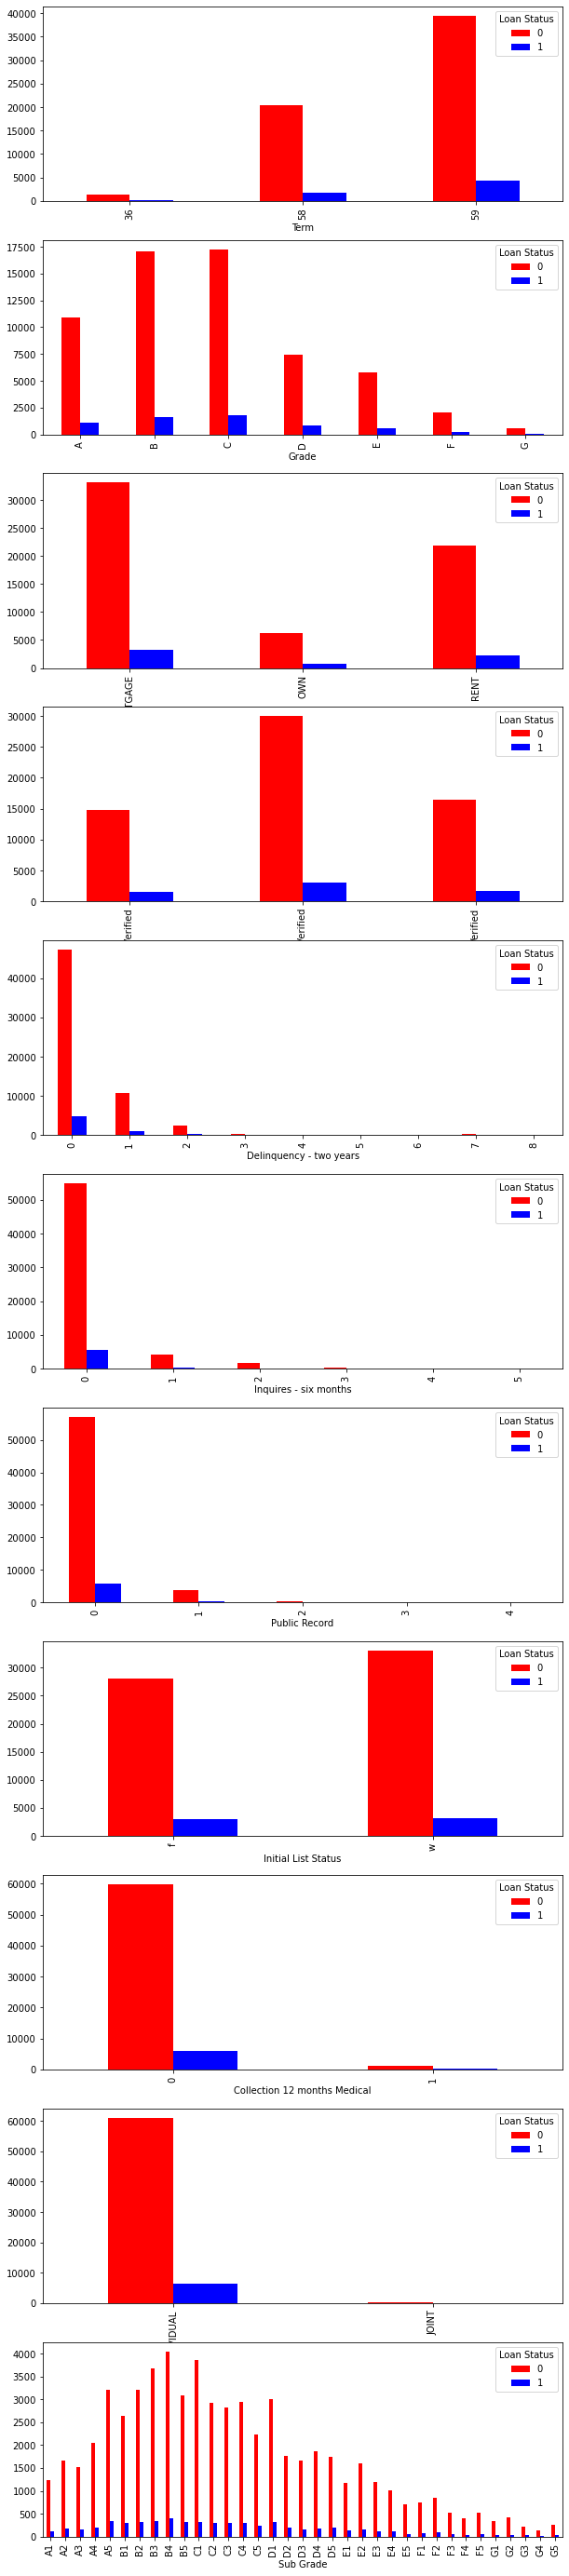

In [19]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Delinquency - two years','Inquires - six months', 'Public Record', 'Initial List Status','Collection 12 months Medical','Application Type','Sub Grade']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

In [20]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [21]:
CategoricalVariables=['Term', 'Grade', 'Employment Duration', 'Verification Status',
       'Delinquency - two years','Inquires - six months', 'Public Record', 'Initial List Status','Collection 12 months Medical','Application Type','Sub Grade']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Loan Status',
              CategoricalVariablesList= CategoricalVariables)

Term is correlated with Loan Status | P-Value: 2.0928026838693296e-09
Grade is correlated with Loan Status | P-Value: 0.029360514462449264
Employment Duration is correlated with Loan Status | P-Value: 0.000318849414713897
Verification Status is NOT correlated with Loan Status | P-Value: 0.718690866314581
Delinquency - two years is NOT correlated with Loan Status | P-Value: 0.15643086666549536
Inquires - six months is NOT correlated with Loan Status | P-Value: 0.8653921075259919
Public Record is NOT correlated with Loan Status | P-Value: 0.053392840959305556
Initial List Status is correlated with Loan Status | P-Value: 0.0005038281525924869
Collection 12 months Medical is NOT correlated with Loan Status | P-Value: 0.8948010447269674
Application Type is NOT correlated with Loan Status | P-Value: 1.0
Sub Grade is NOT correlated with Loan Status | P-Value: 0.5052675609219771


['Term', 'Grade', 'Employment Duration', 'Initial List Status']

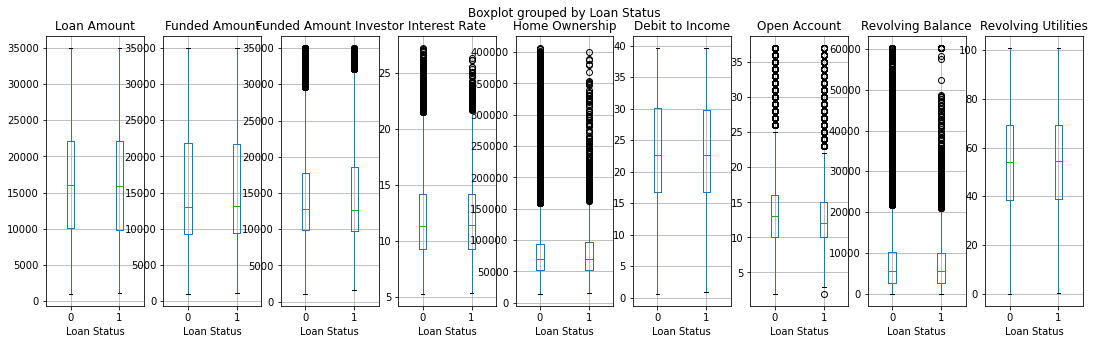

In [22]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['Loan Amount','Funded Amount', 'Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Open Account','Revolving Balance','Revolving Utilities']
                    

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

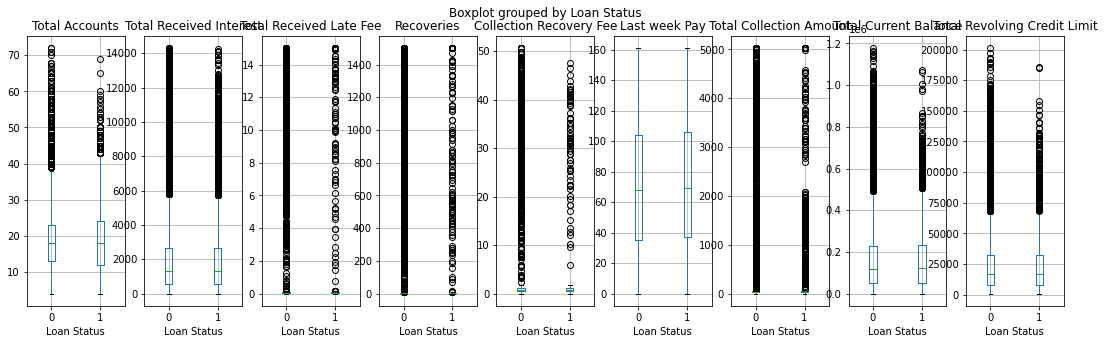

In [23]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['Total Accounts','Total Received Interest','Total Received Late Fee','Recoveries', 'Collection Recovery Fee',
                   'Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan Status', figsize=(10,10), vert=True, ax=PlotCanvas[i])

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Loan Amount','Funded Amount', 'Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Open Account','Revolving Balance','Revolving Utilities','Total Accounts','Total Received Interest','Total Received Late Fee','Recoveries', 'Collection Recovery Fee',
                   'Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit']
FunctionAnova(inpData=LoanData, TargetVariable='Loan Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Loan Amount is NOT correlated with Loan Status | P-Value: 0.24532743370121238
Funded Amount is NOT correlated with Loan Status | P-Value: 0.7231120961020374
Funded Amount Investor is NOT correlated with Loan Status | P-Value: 0.9811486184162733
Interest Rate is NOT correlated with Loan Status | P-Value: 0.4513394637979872
Home Ownership is NOT correlated with Loan Status | P-Value: 0.3344917102292555
Debit to Income is NOT correlated with Loan Status | P-Value: 0.42714577391898256
Open Account is NOT correlated with Loan Status | P-Value: 0.06620701987720404
Revolving Balance is NOT correlated with Loan Status | P-Value: 0.7781710256978407
Revolving Utilities is NOT correlated with Loan Status | P-Value: 0.284592197210366
Total Accounts is NOT correlated with Loan Status | P-Value: 0.954029173097918
Total Received Interest is NOT correlated with Loan Status | P-Value: 0.6626603145173544
Total Received Late Fee is correlated with Loan Status | P-Value: 0.0147

['Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance']

In [9]:
SelectedColumns=['Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance','Term', 'Grade', 'Employment Duration', 'Initial List Status']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Total Received Late Fee,Total Collection Amount,Total Current Balance,Term,Grade,Employment Duration,Initial List Status
0,0.102055,31,311301,59,B,MORTGAGE,w
1,0.036181,53,182610,59,C,RENT,f
2,18.778660,34,89801,59,F,MORTGAGE,w
3,0.044131,40,9189,59,C,MORTGAGE,w
4,19.306646,430,126029,59,C,MORTGAGE,w


In [10]:
DataForML.to_pickle('DataForMLoan.pkl')

In [11]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan Status']=LoanData['Loan Status']

# Printing sample rows
DataForML_Numeric.head()

,Total Received Late Fee,Total Collection Amount,Total Current Balance,Term,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT,Initial List Status_f,Initial List Status_w,Loan Status
0,0.102055,31,311301,59,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0.036181,53,182610,59,0,0,1,0,0,0,0,0,0,1,1,0,0
2,18.778660,34,89801,59,0,0,0,0,0,1,0,1,0,0,0,1,0
3,0.044131,40,9189,59,0,0,1,0,0,0,0,1,0,0,0,1,0
4,19.306646,430,126029,59,0,0,1,0,0,0,0,1,0,0,0,1,0


In [12]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Total Received Late Fee', 'Total Collection Amount',
       'Total Current Balance', 'Term', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Initial List Status_f',
       'Initial List Status_w', 'Loan Status'],
      dtype='object')

In [13]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan Status'
Predictors=['Total Received Late Fee', 'Total Collection Amount',
       'Total Current Balance', 'Term', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Initial List Status_f',
       'Initial List Status_w']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239

[[18380     0]
 [ 1859     0]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.86351375 0.86351375 0.8632988  0.86349387 0.86349387 0.86349387
 0.86349387 0.86349387 0.86349387 0.86349387]

Final Average Accuracy of the model: 0.86


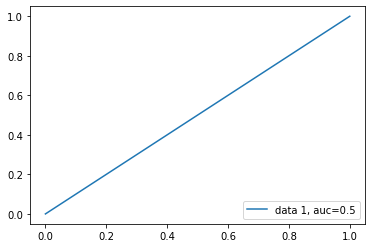

In [31]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG,X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [35]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 61222, 1: 6241})
Resampled dataset shape Counter({0: 6241, 1: 6241})


              precision    recall  f1-score   support

           0       0.50      0.60      0.54      1849
           1       0.51      0.42      0.46      1896

    accuracy                           0.51      3745
   macro avg       0.51      0.51      0.50      3745
weighted avg       0.51      0.51      0.50      3745

[[1107  742]
 [1109  787]]
Accuracy of the model on Testing Sample Data: 0.5

Accuracy values for 10-fold Cross Validation:
 [0.51424948 0.52249865 0.51120295 0.53012744 0.51823616 0.50291789
 0.52133928 0.50734351 0.50861692 0.51902873]

Final Average Accuracy of the model: 0.52


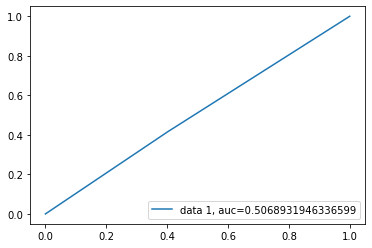

In [36]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG,X_res, y_res, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
from imblearn.over_sampling import RandomOverSampler
print('Original dataset shape %s' % Counter(y))
random_state = 42

rus = RandomOverSampler(random_state=random_state)

X_reso, y_reso = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_reso))


Original dataset shape Counter({0: 61222, 1: 6241})
Resampled dataset shape Counter({0: 61222, 1: 61222})


              precision    recall  f1-score   support

           0       0.52      0.57      0.54     18333
           1       0.52      0.47      0.50     18401

    accuracy                           0.52     36734
   macro avg       0.52      0.52      0.52     36734
weighted avg       0.52      0.52      0.52     36734

[[10455  7878]
 [ 9694  8707]]
Accuracy of the model on Testing Sample Data: 0.52

Accuracy values for 10-fold Cross Validation:
 [0.52392131 0.51655717 0.51099095 0.51963206 0.52450941 0.51282274
 0.52447924 0.52374558 0.5189013  0.52021589]

Final Average Accuracy of the model: 0.52


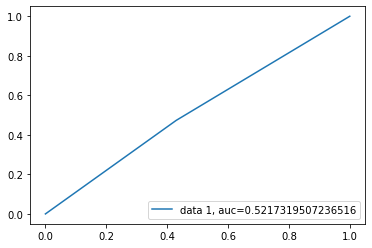

In [38]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_reso, y_reso, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG,X_reso, y_reso, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)

X_ress, y_ress = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_ress))

Original dataset shape Counter({0: 61222, 1: 6241})
Resampled dataset shape Counter({0: 61222, 1: 61222})


              precision    recall  f1-score   support

           0       0.53      0.56      0.54     18333
           1       0.53      0.50      0.52     18401

    accuracy                           0.53     36734
   macro avg       0.53      0.53      0.53     36734
weighted avg       0.53      0.53      0.53     36734

[[10243  8090]
 [ 9173  9228]]
Accuracy of the model on Testing Sample Data: 0.53

Accuracy values for 10-fold Cross Validation:
 [0.51681224 0.52461107 0.52695778 0.52554159 0.52011508 0.51716143
 0.53132752 0.52152189 0.53262113 0.52225084]

Final Average Accuracy of the model: 0.52


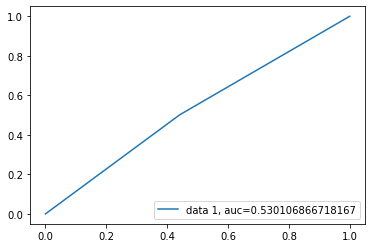

In [40]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_ress, y_ress, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG,X_ress, y_ress, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 6241, 1: 6241})


In [42]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 61222, 1: 61222})


In [43]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 61222, 1: 61222})


DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239

[[18380     0]
 [ 1859     0]]
Accuracy of the model on Testing Sample Data: 0.86


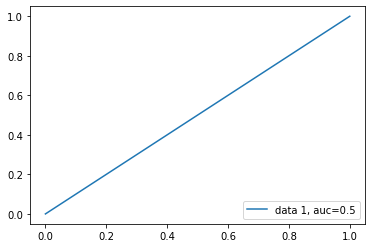


Accuracy values for 10-fold Cross Validation:
 [0.86351375 0.86351375 0.8632988  0.86349387 0.86349387 0.86349387
 0.86349387 0.86349387 0.86349387 0.86349387]

Final Average Accuracy of the model: 0.86


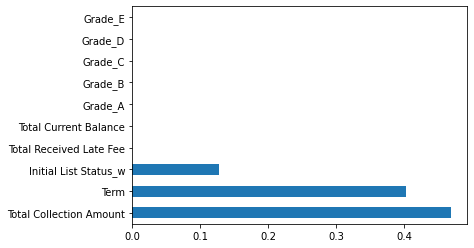

In [44]:
#Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree,X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.51      0.57      0.54      1849
           1       0.53      0.48      0.50      1896

    accuracy                           0.52      3745
   macro avg       0.52      0.52      0.52      3745
weighted avg       0.52      0.52      0.52      3745

[[1050  799]
 [ 993  903]]
Accuracy of the model on Testing Sample Data: 0.52


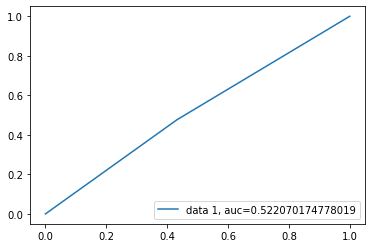


Accuracy values for 10-fold Cross Validation:
 [0.53142247 0.53000721 0.51913074 0.51410362 0.54632927 0.52583587
 0.50577077 0.53370439 0.52666888 0.53841362]

Final Average Accuracy of the model: 0.53


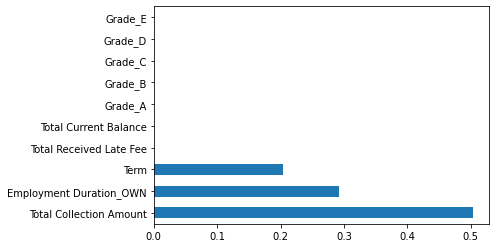

In [45]:
#Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree,X_under, y_under, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.53      0.57      0.55     18333
           1       0.53      0.49      0.51     18401

    accuracy                           0.53     36734
   macro avg       0.53      0.53      0.53     36734
weighted avg       0.53      0.53      0.53     36734

[[10387  7946]
 [ 9361  9040]]
Accuracy of the model on Testing Sample Data: 0.53


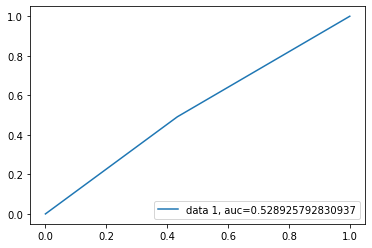


Accuracy values for 10-fold Cross Validation:
 [0.52334548 0.52807812 0.53254707 0.52539051 0.52630607 0.5196834
 0.52300683 0.52209343 0.52911321 0.52986094]

Final Average Accuracy of the model: 0.53


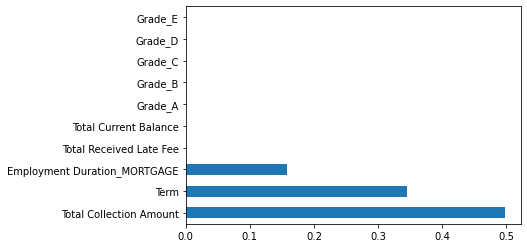

In [46]:
#Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X_over, y_over, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     18333
           1       1.00      0.35      0.52     18401

    accuracy                           0.67     36734
   macro avg       0.80      0.67      0.64     36734
weighted avg       0.80      0.67      0.64     36734

[[18333     0]
 [11976  6425]]
Accuracy of the model on Testing Sample Data: 0.64


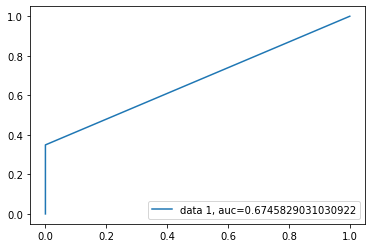


Accuracy values for 10-fold Cross Validation:
 [0.3333787  0.66789706 0.66108843 0.66662121 0.66343726 0.66841351
 0.66592981 0.66798219 0.65875325 0.73441865]

Final Average Accuracy of the model: 0.64


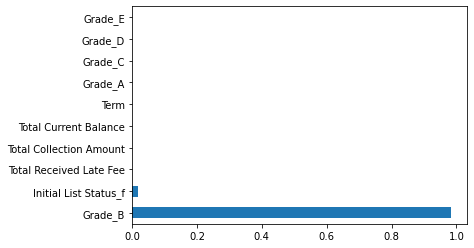

In [47]:
#Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X_smote, y_smote, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239

[[18380     0]
 [ 1859     0]]
Accuracy of the model on Testing Sample Data: 0.86


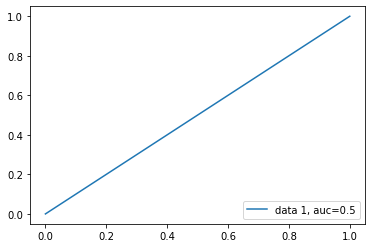


Accuracy values for 10-fold Cross Validation:
 [0.86351375 0.86351375 0.8632988  0.86349387 0.86349387 0.86349387
 0.86349387 0.86349387 0.86349387 0.86349387]

Final Average Accuracy of the model: 0.86


<AxesSubplot:>

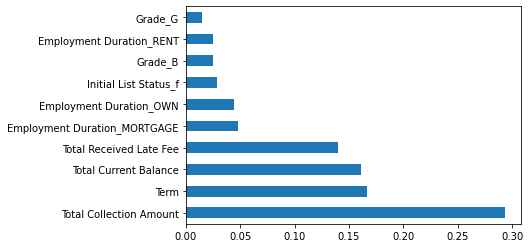

In [48]:
# Random Forest (Bagging of multiple Decision Trees)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1849
           1       0.52      0.46      0.49      1896

    accuracy                           0.51      3745
   macro avg       0.51      0.51      0.51      3745
weighted avg       0.51      0.51      0.51      3745

[[1043  806]
 [1022  874]]
Accuracy of the model on Testing Sample Data: 0.51


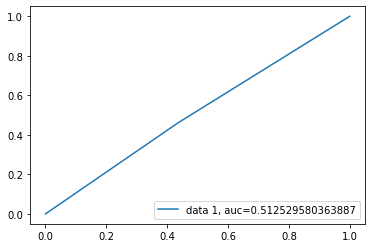


Accuracy values for 10-fold Cross Validation:
 [0.53872994 0.5393571  0.52716587 0.50413402 0.52524598 0.51932109
 0.5100313  0.53926016 0.5314202  0.53897836]

Final Average Accuracy of the model: 0.53


<AxesSubplot:>

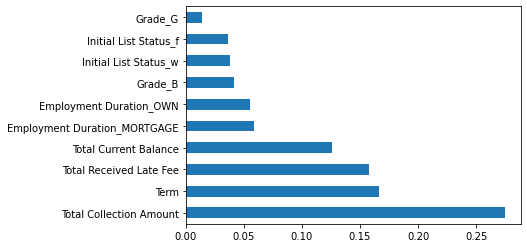

In [49]:
# Random Forest (Bagging of multiple Decision Trees)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X_under, y_under, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.53      0.53      0.53     18333
           1       0.53      0.53      0.53     18401

    accuracy                           0.53     36734
   macro avg       0.53      0.53      0.53     36734
weighted avg       0.53      0.53      0.53     36734

[[9803 8530]
 [8639 9762]]
Accuracy of the model on Testing Sample Data: 0.53


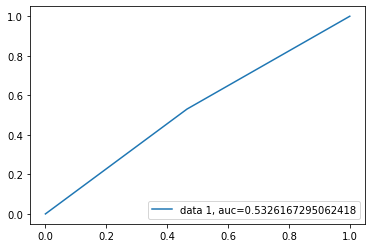


Accuracy values for 10-fold Cross Validation:
 [0.52828293 0.53107442 0.53414278 0.5308029  0.53335826 0.52227813
 0.52607468 0.5205163  0.53298418 0.53745508]

Final Average Accuracy of the model: 0.53


<AxesSubplot:>

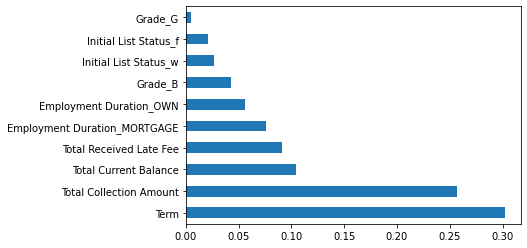

In [50]:
# Random Forest (Bagging of multiple Decision Trees)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X_over, y_over, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     18333
           1       0.97      0.76      0.86     18401

    accuracy                           0.87     36734
   macro avg       0.89      0.87      0.87     36734
weighted avg       0.89      0.87      0.87     36734

[[17970   363]
 [ 4374 14027]]
Accuracy of the model on Testing Sample Data: 0.87


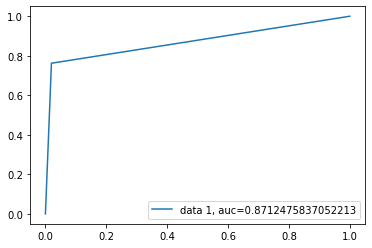


Accuracy values for 10-fold Cross Validation:
 [0.37522108 0.85909099 0.89643155 0.85850737 0.89595247 0.90357299
 0.88857454 0.87387306 0.89388283 0.88021194]

Final Average Accuracy of the model: 0.83


<AxesSubplot:>

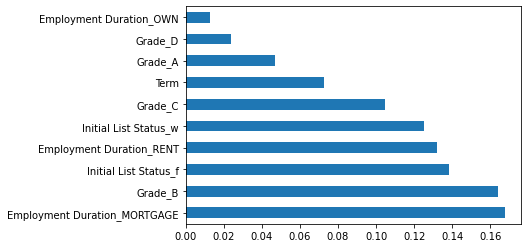

In [51]:
# Random Forest (Bagging of multiple Decision Trees)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X_smote, y_smote, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18380
           1       0.00      0.00      0.00      1859

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.82      0.91      0.86     20239

[[18380     0]
 [ 1859     0]]
Accuracy of the model on Testing Sample Data: 0.86


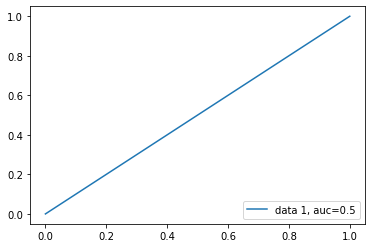


Accuracy values for 10-fold Cross Validation:
 [0.86351375 0.86351375 0.8632988  0.86349387 0.86349387 0.86349387
 0.86349387 0.86349387 0.86349387 0.86349387]

Final Average Accuracy of the model: 0.86


<AxesSubplot:>

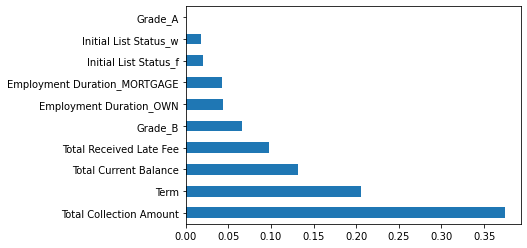

In [52]:
# Adaboost 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB,X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1849
           1       0.52      0.52      0.52      1896

    accuracy                           0.52      3745
   macro avg       0.52      0.52      0.52      3745
weighted avg       0.52      0.52      0.52      3745

[[955 894]
 [916 980]]
Accuracy of the model on Testing Sample Data: 0.52


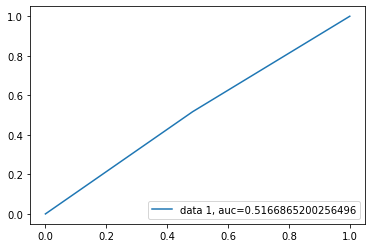


Accuracy values for 10-fold Cross Validation:
 [0.54189796 0.53546413 0.50771385 0.49944157 0.53972248 0.52117666
 0.5087608  0.53685778 0.52873213 0.54482971]

Final Average Accuracy of the model: 0.53


<AxesSubplot:>

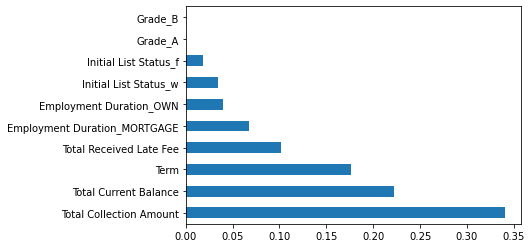

In [53]:
# Adaboost 
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB,X_under, y_under, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Adaboost 
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB,X_over, y_over, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     18333
           1       0.98      0.81      0.88     18401

    accuracy                           0.89     36734
   macro avg       0.91      0.89      0.89     36734
weighted avg       0.91      0.89      0.89     36734

[[17953   380]
 [ 3532 14869]]
Accuracy of the model on Testing Sample Data: 0.89


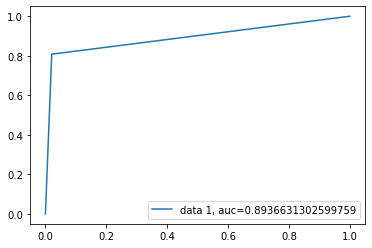

KeyboardInterrupt: 

In [55]:
# Adaboost 
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB,X_smote, y_smote, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X_under, y_under, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X_over, y_over, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X_smote, y_smote, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Naive Bays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = tree_params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)


grid_tree.fit(X_train,y_train)

# tree best estimator
print("Decision Tree best estimator : \n",grid_tree.best_estimator_)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(objective= 'binary:logistic',seed=42)
parameters = {'max_depth': range (2, 10, 1),
              'n_estimators': range(50, 200, 100),
              'learning_rate': [0.1, 0.01, 0.05]}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=True)
grid_search.fit(X_smote, y_smote)
grid_search.best_estimator_

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
from xgboost import XGBClassifier
clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, prediction)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X_smote, y_smote, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [3]:
test=pd.read_csv(r'..\input\test.csv', encoding='latin')
test.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN
5,19101610,12147,10289,5464.780312,58,BAT1766061,5.898844,E,B2,RENT,63041.67141,Verified,n,CC Loan,38.662480,0,0,6,0,7420,78.050997,9,f,272.996168,0.000514,0.957262,0.794313,0,INDIVIDUAL,72,0,21,443777,1260,NaN
6,8293228,16214,16482,32939.840510,58,BAT1104812,7.403273,C,C2,MORTGAGE,26408.53949,Source Verified,n,Credit card refinancing,32.280671,0,0,13,0,10840,81.604854,15,f,322.893757,0.014315,0.816537,0.178010,0,INDIVIDUAL,96,0,34,187252,22035,NaN
7,5669614,7569,23752,22807.696070,36,BAT2078974,10.512555,B,B4,MORTGAGE,65632.75568,Source Verified,n,Credit card refinancing,18.187011,0,0,17,0,6539,85.821407,9,w,625.398786,0.076119,2.105432,0.815390,0,INDIVIDUAL,133,0,46,32919,36421,NaN
8,8395028,20332,12394,5954.210082,58,BAT5849876,10.897032,B,D3,MORTGAGE,74370.68644,Not Verified,n,Credit card refinancing,37.563556,1,0,12,0,40097,71.636560,28,f,4556.794434,0.092716,1.216056,0.177700,0,INDIVIDUAL,68,0,308,245093,22616,NaN
9,4220585,17636,9939,15662.392780,59,BAT1766061,12.522647,B,D3,MORTGAGE,63585.52082,Not Verified,n,Credit card refinancing,16.076524,1,0,11,0,3371,51.601789,20,f,370.153622,0.011467,8.714717,0.435567,0,INDIVIDUAL,68,0,25,185881,28955,NaN


In [4]:
ids = test['ID']

In [5]:
SelectedColumns=['Total Received Late Fee', 'Total Collection Amount', 'Total Current Balance','Term', 'Grade', 'Employment Duration', 'Initial List Status']
# Selecting final columns
DataFortest=test[SelectedColumns]
DataFortest.head()

,Total Received Late Fee,Total Collection Amount,Total Current Balance,Term,Grade,Employment Duration,Initial List Status
0,0.088031,24,475442,59,A,RENT,f
1,0.041237,1,72412,59,B,MORTGAGE,w
2,0.021745,26,284825,59,A,MORTGAGE,f
3,0.092398,32,40842,59,A,RENT,w
4,0.010354,33,90825,58,C,OWN,w


In [6]:
DataForML_test=pd.get_dummies(DataFortest)
# Printing sample rows
DataForML_test.head()

,Total Received Late Fee,Total Collection Amount,Total Current Balance,Term,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT,Initial List Status_f,Initial List Status_w
0,0.088031,24,475442,59,1,0,0,0,0,0,0,0,0,1,1,0
1,0.041237,1,72412,59,0,1,0,0,0,0,0,1,0,0,0,1
2,0.021745,26,284825,59,1,0,0,0,0,0,0,1,0,0,1,0
3,0.092398,32,40842,59,1,0,0,0,0,0,0,0,0,1,0,1
4,0.010354,33,90825,58,0,0,1,0,0,0,0,0,1,0,0,1


In [7]:
DataForML_test.columns

Index(['Total Received Late Fee', 'Total Collection Amount',
       'Total Current Balance', 'Term', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Initial List Status_f',
       'Initial List Status_w'],
      dtype='object')

In [14]:
TargetVariable='Loan Status'
Predictors=['Total Received Late Fee', 'Total Collection Amount',
       'Total Current Balance', 'Term', 'Grade_A', 'Grade_B', 'Grade_C',
       'Grade_D', 'Grade_E', 'Grade_F', 'Grade_G',
       'Employment Duration_MORTGAGE', 'Employment Duration_OWN',
       'Employment Duration_RENT', 'Initial List Status_f',
       'Initial List Status_w']
X_train=DataForML_Numeric[Predictors].values
y_train=DataForML_Numeric[TargetVariable].values
X_test=DataForML_test[Predictors].values

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(67463, 16)
(67463,)
(28913, 16)


In [16]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Printing all the parameters of XGBoost
print(clf)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor=None, random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[11:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
submission = pd.DataFrame({'Loan Status': prediction})
submission.head(30)

,Loan Status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
submission['Loan Status'].value_counts()

0    28910
1        3
Name: Loan Status, dtype: int64

In [22]:
submission.to_csv(r'..\input\sub.csv', header=True, index=False)